<a href="https://colab.research.google.com/github/Mdrsilva/Covid-19_Data_Analysis/blob/main/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science and Data Analysis**
*by [Marriane Silva](https://github.com/Mdrsilva)*

[![LinkedIn](https://img.shields.io/badge/LinkedIn-marrianesilva-blue.svg)](https://www.linkedin.com/in/marriane-dos-reis-silva/)[![GitHub](https://img.shields.io/badge/GitHub-marrianesilva-purple.svg)](https://github.com/Mdrsilva)
---

# Data Analysis on Covid-19 in The World

In December, 2019, the whole world heard about a new *"pneumonia"* outbreak in the Chinese city of Wuhan. Later on, scientists found that China was not dealing with pneumonia. That was the beginning of the ongoing global pandemic, caused by coronavirus, later named Covid-19 or Sars-Cov-2.

The World Health Organization (WHO) declared the outbreak a public health emergency of international concern on 30 January 2020 and a pandemic on 11 March 2020. 

Many educational institutions and public areas were partially or fully closed around the world, and many events were cancelled or postponed during 2020 and 2021.

The COVID-19 vaccines were approved and widely distributed in various countries starting in December 2020, one year later. Besides the vaccines, other recommended preventive measures took place, such as keeping social distancing, wearing masks, improving ventilation and air filtration, and quarantining those who have been exposed or are symptomatic. Public health mitigation measures included travel restrictions, lockdowns, business restrictions and closures, quarantines, testing systems, and contact tracing of the infected.
Everything together with treatments, would serve to bring about the control and eventual end of the pandemic.


As of 11 December 2022, the pandemic had caused more than **649 million cases** and **6.65 million confirmed deaths**, making it one of the deadliest in history.

The pandemic has triggered severe social and economic disruption around the world. The pandemic also has raised issues of racial and geographic discrimination, health equity, and the balance between public health imperatives and individual rights.


<center><img alt="Analysing Airbnb" width="100%" src="https://img.freepik.com/free-vector/covid19-novel-coronavirus-banner-with-virus-cell_1017-24736.jpg?w=1380&t=st=1671001909~exp=1671002509~hmac=ec72c799569382bbabff255301bd6de810345ceeba62c484d09466e74b28b818"></center>

I will analyze the public data of COVID-19, and extract insights from the raw data.


The dataset I wil use in this project is being updated daily throughout the duration of COVID-19 pandemic and is maintained by *Our World in Data*.  The complete dataset comes from the [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) (JHU), which aggregates official sources, such as the [World Health Organization](https://www.who.int/) (WHO). More information, can be found [here](https://github.com/owid/covid-19-data/tree/master/public/data).

While the WHO considers the pandemic global and ongoing as of October 2022, some countries are transitioning their public health approach towards regarding SARS-CoV-2 as an endemic virus.

**Last but not least, thank you all the health care workers and first responders, who have working hard this pandemig times, in order to save lives.**

# **Obtaining the Data**

The data used in this project is on  [*Our World in Data*](https://github.com/owid/covid-19-data/tree/master/public/data) portal and is composed of 1 table, **_owid-covid-data.csv_**, which includes all of the historical data on the pandemic up to the date of publication.

The dataset provides information such as confirmed cases, deaths, hospitalizations and tests.

In the `Variables dictionary` section I will describe most of the variables used in my analysis.

In [56]:
# Importing all the required libraries needed for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for style and appearance
sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)

pd.set_option('display.max_rows', None);


## Helper Functions

In [61]:
# Function make_text

def make_text(rows, # number of rows
              cols, # number of cols
              texts, # number of texts to display
              result, # featured text
              label = '', # detailed text
              font1_size = 80, # featured text font size
              font2_size = 20, # detailed text font size
              ha = 'center', # horizontal alignment
              va = 'center', # vertical alignment
              font1_color = '#4580ba', # featured text font color
              font2_color = '#5F6A6A', # detailed text font color
              font1_weight = 'bold', # featured text font weight
              font2_weight = 'normal', # detailed text font weight
              sup_title = '', # suptitle
              font_suptitle = 30, # font size suptitle
              title1 = '', # title left figure
              title2 = '', # title right figure
              loc = 'center', # loc
              font_title = 20, # font size of titles
              a = 0.5, # percentage for va featured text
              b = 0.5, # percentage for ha featured text
              c = 0.5, # percentage for va detailed text
              d = 0.1, # percentage for ha detailed text
              figsize = (6, 2) # figure size
             ): 
    
    # axes coordenates

    left, width = 0.25, 0.5
    bottom, height = 0.25, 0.5
    right = left + width
    top = bottom + height
    
    # text fonts
    
    fonttitle = {'family': 'sans-serif', 'weight': 'normal', 'size': font_title, 'horizontalalignment': loc}
    font1 = {'family': 'sans-serif', 'color': font1_color, 'weight': font1_weight, 'size': font1_size}
    font2 = {'family': 'sans-serif', 'color':font2_color, 'weight': font2_weight, 'size': font2_size} 
        
    # creating texts
    
    if texts > 1:
        
        # creating the figure for texts
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax = ax.ravel()
        
        for i in range(len(result)):
            
            if i == 0:
                ax[i].set_title(title1, fontdict = fonttitle)
            elif i == 1:
                ax[i].set_title(title2, fontdict = fonttitle)
                           
            ax[i].set(xlim = (0, 1), ylim = (0, 1))
                
            ax[i].text(a * (left + right), b * (bottom + top), result[i],
                    ha = ha,
                    va = va,
                    fontdict = font1,
                    transform = ax[i].transAxes)
            if label != '':
                ax[i].text(c * (left + right), d * (bottom + top), label[i],
                        ha = ha,
                        va = va,
                        fontdict = font2,
                        transform = ax[i].transAxes)
   
            ax[i].axis('off')
            
        plt.suptitle(sup_title, fontsize = font_suptitle)
                      
    else:
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax.set_title(title1, fontdict = fonttitle)
        
        ax.set(xlim = (0, 1), ylim = (0, 1))
                
        ax.text(a * (left + right), b * (bottom + top), result,
                ha = ha,
                va = va,
                fontdict = font1,
                transform = ax.transAxes)
        ax.text(c * (left + right), d * (bottom + top), label,
                ha = ha,
                va = va,
                fontdict = font2,
                transform = ax.transAxes)
                
        ax.axis('off')
        
    plt.suptitle(sup_title, fontsize = font_suptitle)
      
    plt.show()

Before moving forward, I will import the table and do some basic visualizations.


In [7]:
# Importing data
df_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# **Exploratory Data Analysis (EDA)**

Understanding the data is a fundamental step in any data science project.

Here we focus on examining and understanding the data, extracting insights and main characteristics, as well as how the information is structured.

The step helps us understand the type of problem and how we will solve it.

**Variables dictionary**

Variable | Description
------|------
`iso_code` | ISO 3166-1 alpha-3 – three-letter country codes. Note that OWID-defined regions (e.g. continents like 'Europe') contain prefix 'OWID'
`continent` | Continent of the geographical location
`location` | Geographical location. Location 'International' considers special regions ("Diamond Princess" and "MS Zandam" cruises)
`date`| Date of observation
`total_cases`|Total confirmed cases of COVID-19. Counts can include probable cases, where reported
`total_cases_per_million`| Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported
`new_cases`| New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, the metric is set to NA
`new_cases_smoothed`| New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported
`new_cases_per_million`| Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported
`new_cases_smoothed_per_million`| New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported
`total_deaths`| Total deaths attributed to COVID-19. Counts can include probable deaths, where reported
`total_deaths_per_million`| Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported
`new_deaths`| New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, the metric is set to N.
`new_deaths_smoothed`| New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported
`new_deaths_per_million`| New deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported
`new_deaths_smoothed_per_million`| New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable deaths, where reported
`total_tests`| Total tests for COVID-19
`total_tests_per_thousand`| Total tests for COVID-19 per 1,000 people
`new_tests`| New tests for COVID-19 (only calculated for consecutive days)
`new_tests_smoothed`| New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, it is assumed that testing changed equally on a daily basis over any periods in which no data was reported. </p>This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
`new_tests_per_thousand`| Total tests for COVID-19 per 1,000 people
`new_tests_smoothed_per_thousand`| New tests for COVID-19 (7-day smoothed) per 1,000 people
`tests_per_case`| Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)
`tests_units`| Units used by the location to report its testing data. A country file can't contain mixed units.</p>All metrics concerning testing data use the specified test unit. Valid units are 'people tested' (number of people tested), 'tests performed' (number of tests performed. a single person can be tested more than once in a given day)</p> and 'samples tested' (number of samples tested. In some cases, more than one sample may be required to perform a given test)
`total_vaccinations` | Total number of COVID-19 vaccination doses administered
`total_vaccinations_per_hundred`| Total number of COVID-19 vaccination doses administered per 100 people in the total population
`people_vaccinated`| Total number of people who received at least one vaccine dose.
`people_fully_vaccinated`| TTotal number of people who received all doses prescribed by the initial vaccination protocol
`new_vaccinations`| New COVID-19 vaccination doses administered (only calculated for consecutive days)
`new_vaccinations_smoothed`| New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, it is assumed that vaccination changed equally on a daily basis over any periods in which no data was reported.</p>This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
`new_vaccinations_smoothed_per_million`| New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population
`people_vaccinated_per_hundred`| Total number of people who received at least one vaccine dose per 100 people in the total population
`people_fully_vaccinated_per_hundred`| Total number of people who received all doses prescribed by the initial vaccination protocol per 100 people in the total population
`new_people_vaccinated_smoothed`| Daily number of people receiving their first vaccine dose (7-day smoothed)
`new_people_vaccinated_smoothed_per_hundred`| Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population
`total_boosters`| Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)
`total_boosters_per_hundred`| Total number of COVID-19 vaccination booster doses administered per 100 people in the total population
`weekly_hosp_admissions_per_million`| Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people (reporting date and the preceeding 6 days)
`weekly_hosp_admissions`| Number of COVID-19 patients newly admitted to hospitals in a given week (reporting date and the preceeding 6 days)
`weekly_icu_admissions_per_million`| Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people (reporting date and the preceeding 6 days)
`weekly_icu_admissions`| Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week (reporting date and the preceeding 6 days)
`hosp_patients_per_million`| Number of COVID-19 patients in hospital on a given day per 1,000,000 people
`hosp_patients`| Number of COVID-19 patients in hospital on a given day
`icu_patients_per_million`| Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
`icu_patients`| Number of COVID-19 patients in intensive care units (ICUs) on a given day
`positive_rate`| The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
`reproduction_rate`| Real-time estimate of the effective reproduction rate (R) of COVID-19
`stringency_index`| Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
`population`| Population (latest available values)
`population_density`| Number of people divided by land area, measured in square kilometers (Km²), most recent year available
`median_age`| Median age of the population, UN projection for 2020
`aged_65_older`|Share of the population that is 65 years and older, most recent year available
`aged_70_older`| Share of the population that is 70 years and older in 2015
`cardiovasc_death_rate`| Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
`gdp_per_capita`| Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
`handwashing_facilities`| Share of the population with basic handwashing facilities on premises, most recent year available
`hospital_beds_per_thousand`| Hospital beds per 1,000 people, most recent year available since 2010
`excess_mortality`| Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the projected number of deaths for the same period based on previous years
`excess_mortality_cumulative`| Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on previous years
`excess_mortality_cumulative_absolute`| Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years
`excess_mortality_cumulative_per_million`| Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years, per million people
`extreme_poverty`| Share of the population living in extreme poverty, most recent year available since 2010
`cardiovasc_death_rate`| Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
`diabetes_prevalence`| Diabetes prevalence (% of population aged 20 to 79) in 2017
`female_smokers`| Share of women who smoke, most recent year available
`male_smokers`| Share of men who smoke, most recent year available
`life_expectancy`| Life expectancy at birth in 2019
`human_development_index`| A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living.</p>Values for 2019, imported from http://hdr.undp.org/en/indicators/137506




Let's check the **df_covid** size and take a look at the table, displaying the first 5 entries.

In [8]:
# Checking the first entries of the dataset
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [9]:
# Showing columns name
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Below, we can see the size of the dataset and the types of its variables.

In [10]:
# Checking dataset's size and number of variables
print("Entries:\t{}".format(df_covid.shape[0]))
print("Variables:\t{}".format(df_covid.shape[1]))
print("\n")

# Checking types of variables
df_covid.dtypes


Entries:	245307
Variables:	67




iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

The df_covid_covid table has almost 245k rows and 67 columns. 

As we can see, all columns are of float type, except for `iso_code`, 
`continent`, `location`, `date` and `tests_units`.

As the `date` variable represents time, I will convert this column to a datetime format.

In [11]:
#  Converting the date column to datetime
df_covid.date = pd.to_datetime(df_covid.date)

Sometimes, due to typographical error, we can have attributes referring to the same, for example, Canada and CaNada are not considered as the same.
To avoid this, I will make sure the name of each country starts with a capitalized letter and the rest is all composed by lower cases.
Python allows us to do this by using `title()` function.


In [12]:
# Setting all locations to first letter capitalized
df_covid['location'] = df_covid['location'].apply(lambda x: x.title())

# Number of countries available
print('Total of different entries in the location column: {}'.format(len(df_covid.location.value_counts())))

Total of different entries in the location column: 248


As we can see, there are information of **248 diferent entries** in the `location` column. Before my analysis, I will clean this column as not every entry refers to a country.

## Cleaning the Dataset

I noticed that the location variable contains countries name, some rows with continent name, which has the aggregated information for all countries within that specific continent and some other entries accumulated for region, all listed below:

* OWID_WRL:	World
* OWID_INT:	International
* OWID_AFR:	Africa
* OWID_ASI:	Asia
* OWID_EUR:	Europe
* OWID_OCE:	Oceania
* OWID_SAM:	South America
* OWID_NAM:	North America
* OWID_EUN:	European Union
* OWID_LIC:	Low income
* OWID_LMC:	Lower middle income
* OWID_HIC:	High income 
* OWID_UMC:	Upper middle income

As I am interested to analyze at a country level, I will remove those rows from the dataset.

I will create a copy of the dataset.

In [13]:
# Creating a copy of the dataset
df_clean = df_covid.copy()

# Removing continents and others information from location column
df_clean = df_clean.drop(df_clean[df_clean.location == 'Asia'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Africa'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'South America'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'North America'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Europe'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Oceania'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'European Union'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'High Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Low Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Lower Middle Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Upper Middle Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'International'].index)

# Another option of removing the totals from location column
# df_clean = df_covid[~df_covid['iso_code'].str.contains('OWID')]

## Dealing with missing values


The quality of a dataset is related to the number of missing values. Understanding whether these null values are significant compared to the total entries is crucial. That being said, it is important to be able to deal with messy data, whether that means missing values, inconsistent formatting, disarranged records, or meaningless outliers.

Lets check the columns with missing values.


In [14]:
# Sorting variables in descending order by missing value count
round((df_clean.isnull().sum()/df_clean.shape[0]).sort_values(ascending=False),2)

excess_mortality_cumulative_per_million       0.96
excess_mortality_cumulative                   0.96
excess_mortality_cumulative_absolute          0.96
weekly_icu_admissions                         0.96
weekly_icu_admissions_per_million             0.96
excess_mortality                              0.96
weekly_hosp_admissions                        0.92
weekly_hosp_admissions_per_million            0.92
total_boosters                                0.86
total_boosters_per_hundred                    0.86
icu_patients                                  0.86
icu_patients_per_million                      0.86
hosp_patients_per_million                     0.84
hosp_patients                                 0.84
new_vaccinations                              0.79
people_fully_vaccinated                       0.76
people_fully_vaccinated_per_hundred           0.76
people_vaccinated_per_hundred                 0.75
people_vaccinated                             0.75
total_vaccinations_per_hundred 

#########################REWRITE IT#######################################################


* We can see that 100% of values are missing in the `neighbourhood_group` column. As a result, I will not include this column in my analysis.
* There are approximately 31% missing values in the `license` column. It is likely due to the non-existence of the room/property licensing being published by an individual.
* The `reviews_per_month` and `last_review` variables have around the same quantity of missing values (approximately 15% of the entries). I will verify whether the number of reviews for these locations is zero.
* There are no missing values in the other columns.
There are lots of missing data, weekly_icu_admissions has 99.121062% of its values missing.
However, let's remember that Covid isn't done, the pandemic isn't over. Consequently, these values will change in the future. We will also have more data available.
It's also important to remember that having missing values doesn't necessarily means they are actually missing. Wait, what?
Yes, new_vaccinations has 96% of its values missing, however not all countries have started vaccination, how would they send data they don't have?
Keep that in mind.


Looking at the Variables’ Dictionary and the types of variables presented in the dataset, it is possible to see a variable not relevant for the analysis, which is police_station. For a cleaner and more objective analysis, I deleted this variable.

Since some of the columns are pretty important for the analysis, I dropped entire rows which miss any crucial value. For that, I used the dropNA() function in Pandas.

The columns I didn’t want to drop entire rows, I opted to fill them with the ‘UNKNOWN’ value (These include variables that contain information about the victims of the crime, such as their age group, race, and gender). I used the fillNA() function for that.

It is worth mention that some specific variables have a lot of NaN values, and they don’t necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where the crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the drop() function.

# **Data Analysis**

In order to have a better understanding of the pandemic, I will extract the most recent data available.

In [58]:
# Displaying the most recent date available in the dataset
last_date = str(df_clean.date.max())[0:10]
last_date

'2022-12-25'

As mentioned, the dataset is being updated daily throughout the duration of COVID-19 pandemic. As the most recent available date is Dec **25nd, 2022** (at the time of the data extraction for this project), I will pass `2022-12-25` as the parameter and take a look at the country with the highest number of cases up to **Dec 25nd, 2022**.

Total cases of covid-19: 657051247.0
Total death of covid-19: 6678822.0


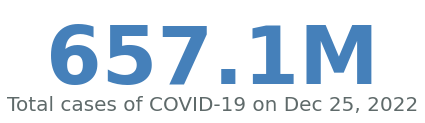

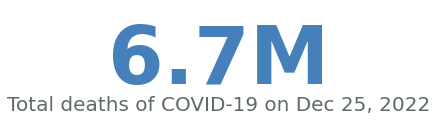

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
242292,OWID_WRL,NaN,World,2022-12-25,657051247.0,248131.0,571088.429,6678822.0,723.0,1850.429,82387.786,31.113,71.609,837.459,0.091,0.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.309264e+10,5.475427e+09,5.036791e+09,2.666772e+09,NaN,NaN,164.17,68.66,63.16,33.44,NaN,NaN,NaN,NaN,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
231614,USA,North America,United States,2022-12-25,100374019.0,2467.0,67292.857,1090204.0,0.0,374.429,296710.106,7.293,198.921,3222.692,0.000,1.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN
100885,IND,Asia,India,2022-12-25,44678517.0,187.0,172.429,530695.0,2.0,3.000,31526.506,0.132,0.122,374.474,0.001,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200495e+09,1.027155e+09,9.511192e+08,2.222215e+08,96923.0,69218.0,155.27,72.48,67.11,15.68,49.0,5299.0,0.0,NaN,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
77737,FRA,Europe,France,2022-12-25,39158905.0,NaN,NaN,161221.0,NaN,NaN,577454.249,NaN,NaN,2377.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.100,35.600,NaN,5.980,82.66,0.901,6.781300e+07,NaN,NaN,NaN,NaN
82884,DEU,Europe,Germany,2022-12-25,37211966.0,15.0,33011.857,160768.0,NaN,NaN,446348.056,0.180,395.969,1928.371,NaN,NaN,NaN,1270.0,15.233,NaN,NaN,1135.0,13.614,9193.0,110.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.200,33.100,NaN,8.000,81.33,0.947,8.336984e+07,NaN,NaN,NaN,NaN


In [64]:
# Total cases on 12/25/22
print('Total cases of covid-19: {}'.format(df_clean['total_cases'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()))

# Total death on 12/25/22
print('Total death of covid-19: {}'.format(df_clean['total_deaths'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()))

# making the text
make_text(1,
          1,
          1,
          str(round(df_clean['total_cases'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()/1000000,1)) + 'M',
          'Total cases of COVID-19 on Dec 25, 2022')

# making the text
make_text(1,
          1,
          1,
          str(round(df_clean['total_deaths'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()/1000000,1)) + 'M',
          'Total deaths of COVID-19 on Dec 25, 2022')


print('\n\n')

# Countries with highest number of cases on Dec 25rd, 2022
df_clean.loc[df_clean.date == last_date].sort_values(by="total_cases", ascending=False).head()



The count of total cases of COVID-19 in the World reported was 651.1 millions up to December 25, 2022. The total death was about 6.7 million (or 1% of the cases).	

The leading countries were:
* United States - 100.3 million cases
* India - 44.6 million cases
* France - 39.1 million cases
* Germany - 37.2 million cases


######## RE READ AND DELETE################################################


The count of total cases of COVID-19 on First Nations reserves reported to ISC was 777 as of December 15, 2022. These numbers are First Nations reserves reported to ISC was 777 as of December 15, 2022. 

These numbers are
Brazil is top-ranked, followed by the USA, they both had 75102 and 67164 new cases yesterday, respectively.

Brazil - 69609
USA - 58062
As someone who lives in Brazil, this makes a lot of sense to me. People aren't following quarantine nor social distancing at all. Many even say that the pandemic is over, which is not. Sadly, the government also doesn't provide useful help to the people. Instead, they've been closing businesses and cutting social assistance.

Now, let's check the death cases.

In [66]:
# Countries with highest number of deaths on Dec 25rd, 2022
df_clean.loc[df_clean.date == last_date].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
231614,USA,North America,United States,2022-12-25,100374019.0,2467.0,67292.857,1090204.0,0.0,374.429,296710.106,7.293,198.921,3222.692,0.000,1.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN
30892,BRA,South America,Brazil,2022-12-25,36092845.0,NaN,NaN,692652.0,NaN,NaN,167629.268,NaN,NaN,3216.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.802885e+08,1.885431e+08,174872899.0,122604684.0,15547.0,18977.0,223.06,87.57,81.22,56.94,88.0,2894.0,0.001,NaN,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2.153135e+08,NaN,NaN,NaN,NaN
100885,IND,Asia,India,2022-12-25,44678517.0,187.0,172.429,530695.0,2.0,3.000,31526.506,0.132,0.122,374.474,0.001,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200495e+09,1.027155e+09,951119216.0,222221515.0,96923.0,69218.0,155.27,72.48,67.11,15.68,49.0,5299.0,0.000,NaN,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
182077,RUS,Europe,Russia,2022-12-25,21456626.0,6550.0,6838.571,385463.0,52.0,54.286,148269.884,45.262,47.256,2663.632,0.359,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7614.0,52.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19494114.0,NaN,NaN,NaN,NaN,NaN,13.47,NaN,NaN,NaN,NaN,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1.447133e+08,NaN,NaN,NaN,NaN
141191,MEX,North America,Mexico,2022-12-25,7221051.0,NaN,NaN,331013.0,NaN,NaN,56633.864,NaN,NaN,2596.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,1.275041e+08,NaN,NaN,NaN,NaN


The leading countries in total of deaths were:

* United States - 1.0 million deaths
* Brazil - 692.6 thousand deaths
* India - 530.6 thousand deaths
* Russia - 385.3 thousand deaths
* Mexico - 331.0 thousand deaths

Let's a plot a bar chart of the total death cases by country.

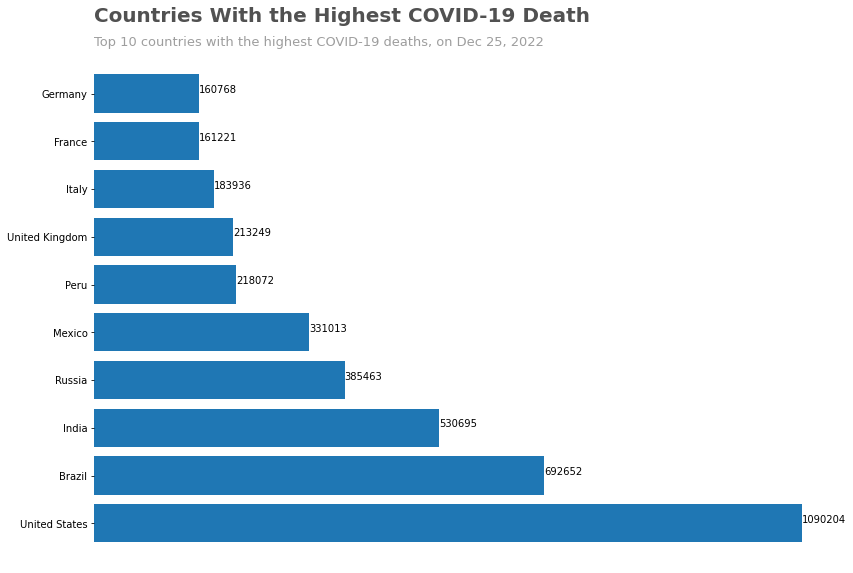

In [83]:
print("\n\n")

from matplotlib.gridspec import tight_layout

# Settign font as Arial
plt.rcParams['font.family'] = 'sans-serif'

# Setting colours
grey = "#9E9E9E"
# grey = "#5F6A6A"
grey_text = "#515151"


top_10_total_deaths = df_clean.loc[df_clean.date == last_date, ['location', 
                                                                'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:11]

fig, ax = plt.subplots(figsize=(12,8))

ax.barh('location', 'total_deaths', data = top_10_total_deaths)
# ax.set_ylabel("Country")
# ax.set_xlabel("Total deaths")


# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Removing xticks
ax.set_xticks(ticks=[])

# #remover titulos
# ax.set_ylabel('')    
# ax.set_xlabel('')

# plt.tick_params(
#     axis='both',         
#     which='both',     
#     bottom=False,      
#     top=False,         
#     labelbottom=False)


# title
plt.text(-1.15, 10.5,'Countries With the Highest COVID-19 Death', fontsize=20, color=grey_text, fontweight='bold')
plt.text(-1.15, 10,'Top 10 countries with the highest COVID-19 deaths, on Dec 25, 2022', fontsize=13, color=grey)

initialx=0

# adicionar labels
for p in ax.patches:
  ax.text(p.get_width(),
          initialx+p.get_height()/50,
          '{:1.0f}'.format(p.get_width()))
  initialx+=1

# #função para inserir rótulos
# def autolabel (grupos):
#     for i in grupos:
#         h = i.get_height()
#         ax.annotate ('{:.2f}'.format(v),
#                      xy = (i.get_x()+i.get_width()/2,h),
#                      xytext = (0,4),
#                      textcoords = 'offset points', 
#                      ha = 'center')



plt.tight_layout()

As we can see, Brazil is the second country with the highest number of deaths in the world, totaling 692,6 thousand victims up to 12/25/2022.

The United States ranks first, with more than 1,09 million deaths. India, Russia and Mexico occupy the third, fourth and fifth position, respectively. 


# Reescrever essa parte

Apesar do Brasil estar no ranking de mais mortes em segundo lugar, não podemos esquecer que estes são valores absolutos e que a população do Brasil é diferente dos demais países.


#########
Next, I will check how the moving average of the number of deaths in Brazil behaved in relation to these five countries, in the interval of 1 year until the present date.

One of the biggest concerns of health organizations is the progression of the number of cases and deaths in the world.

One of the best ways to visualize evolution over time is the line chart. Therefore, let's plot line graph to demonstrate the evolution of cases and deaths in the world.

For that, I will use the 'df_world' dataset, which contains the daily registers of COVID-19.

In [131]:
# Creating a dataset with the daily registers of Covid-19
df_world = df_clean.loc[df_clean.location == "World"]
df = df_clean.loc[df_clean.location == "World"]

# Checking missing values in the tota_cases, total_deaths, new_cases and new_deaths columns
print("\nMissing values in total_cases column: {}".format(df_world.total_cases.isnull().sum()))
print("\nMissing values in total_deaths column: {}".format(df_world.total_deaths.isnull().sum()))
print("\nMissing values in new_cases column: {}".format(df_world.new_cases.isnull().sum()))
print("\nMissing values in new_deaths column: {}".format(df_world.new_deaths.isnull().sum()))




Missing values in total_cases column: 0

Missing values in total_deaths column: 0

Missing values in new_cases column: 0

Missing values in new_deaths column: 0


As we can see, there are no missing values in the `total_cases`, `total_deaths`, `new_cases` and `new_deaths` variables.

Lets now check the total cases and total deaths over the years.

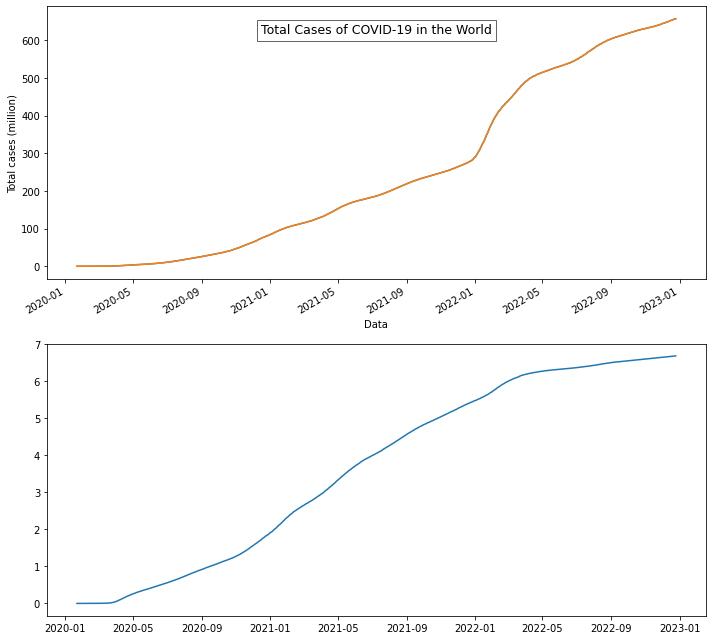

In [127]:
# Passing date column as new index
df_world.index = df_world.date

# Plotting total cases and total deaths

fig, (ax1, ax2) = plt.subplots(nrows= 2, ncols=1, figsize=(10,9))

# Plotting lines
ax1.plot(df_world['total_cases'] / 1000000)
ax2.plot(df_world['total_deaths'] / 1000000)

def add_titlebox(ax, text):

     ax.text(.50, .9, text,
        horizontalalignment='center',
        transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.6),
         fontsize=12.5)
     return ax

(df_world['total_cases'] / 1000000).plot(kind="line", ax=ax1)
#ax1.set_title("Casos de Covid-19 no Mundo")
add_titlebox(ax1, 'Total Cases of COVID-19 in the World')
ax1.set_ylabel("Total cases (million)")
ax1.set_xlabel("Data")

# (df_world['total_deaths'] / 1000000).plot(kind="line", ax=ax, color="r")
# #ax2.set_title("Mortes por Covid-19 no Mundo")
# add_titlebox(ax, 'Mortes por Covid-19 no Mundo')
# ax.set_ylabel("Mortes por Covid (milhões)")
# ax.set_xlabel("Data")

plt.tight_layout()
# plt.savefig('cases_and_deaths_world.png')

In [130]:
# Checking missing values in the tota_cases and total_deaths columns
print("\nMissing values in total_cases column: {}".format(df_world.new_cases.isnull().sum()))
print("\nMissing values in total_deaths column: {}".format(df_world.new_deaths.isnull().sum()))



Missing values in total_cases column: 0

Missing values in total_deaths column: 0


It may be interesting to track the new cases and new deaths.

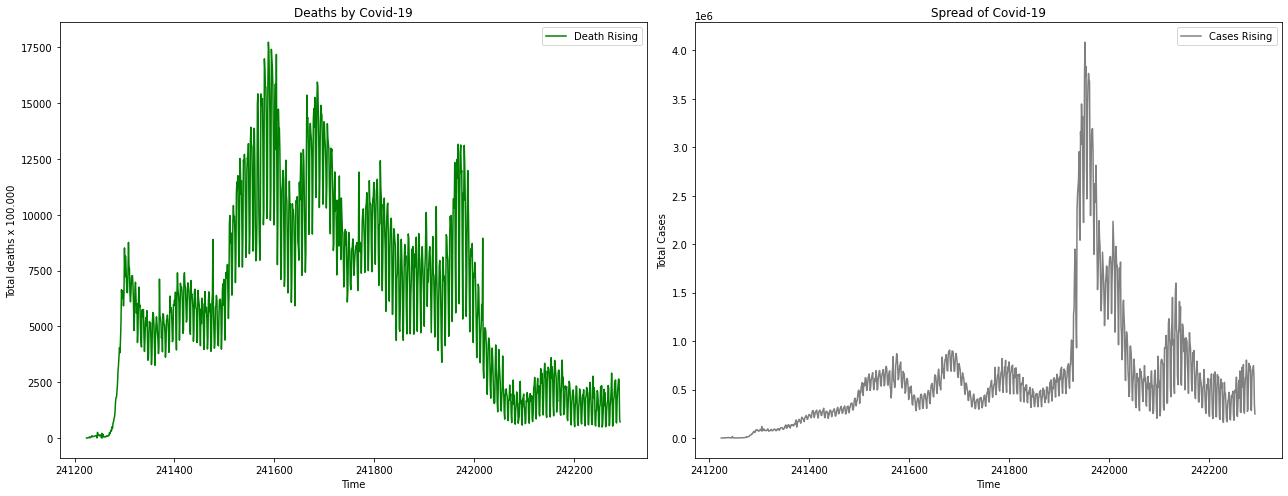

In [129]:
# Creating Figure and 2 Axis
fig, (ax1, ax2) = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)

# Plotting first graph
location = df.loc[df.location == 'World', 'new_deaths']
ax1.plot(location, label='Death Rising')
ax1.set(title='Deaths by Covid-19', ylabel='Total deaths x 100.000', xlabel='Time')
ax1.get_lines()[0].set(color="green")
ax1.legend()
plt.tight_layout()

# Plotting second graph
location = df.loc[df.location == 'World', 'new_cases']
ax2.plot(location, label='Cases Rising')
ax2.set(title='Spread of Covid-19', ylabel='Total Cases', xlabel='Time')
ax2.get_lines()[0].set(color="grey")
ax2.legend()
plt.tight_layout()
plt.savefig('spread_covid.png', bbox_inches='tight')

# Passing date column as new index
df_world.index = df_world.date

---



In [85]:
first_register = str(df_clean.date.min())[0:10]
first_register

'2020-01-01'

In [87]:
df_clean.loc[df_clean.date == '2020-01-01'].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
140102,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,127504120.0,NaN,NaN,NaN,NaN


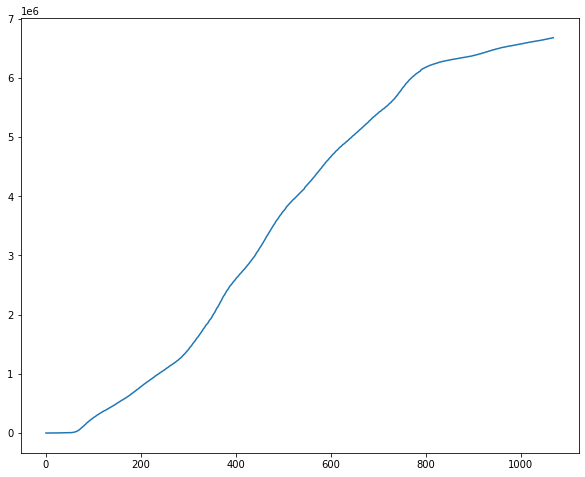

In [ ]:
df_clean.loc[df_clean.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

In [ ]:
# Creating a copy of the dataset with Brazil
df_brasil = df_clean.loc[df_clean.location == "Brazil"].copy()
df_brasil.head()

# Creating a copy of the dataset with Canada
df_canada = df_clean.loc[df_clean.location == "Canada"].copy()
df_canada.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
38051,CAN,North America,Canada,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,0.052,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
38052,CAN,North America,Canada,2020-01-24,3.0,1.0,NaN,NaN,NaN,NaN,0.078,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
38053,CAN,North America,Canada,2020-01-25,3.0,0.0,NaN,NaN,NaN,NaN,0.078,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
38054,CAN,North America,Canada,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.078,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,-873.4,-3.41,-2.47,-22.712658
38055,CAN,North America,Canada,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,0.078,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


FAZER UM GRAFICO COM OS CASOS E MORTES AO LONGO DO TEMPO E TRACAR UM LINHA QUANDO A VACINA COMECOU A SER INSERIDA

In [ ]:
# Number of reviews for locations that have a null last_review column
df_covid_covid[df_covid_covid.new_vaccinations.isnull()].new_vaccinations.sum()

0.0

In [ ]:
# Number of reviews for locations that have a null reviews_per_month column
df_covid_airbnb[df_covid_airbnb.reviews_per_month.isnull()].number_of_reviews.sum()

0

I can conclude that the null data actually contains information for the dataset as the database has already been handled by AirBnb staff. Based on the findings above, I will replace the invalid data in the `reviews_per_month` column and the `license` column with zero and the string 'No license', respectively.

In [ ]:
# Replacing the null data in the license column
df_covid_airbnb.license.replace(np.nan, 'No license', inplace=True)

In [ ]:
# Replacing the null data in the license reviews_per_month
df_covid_airbnb.reviews_per_month.replace(np.nan, 0, inplace=True)

With 100% of missing values, the column `neighbourhood_group` has no predictive power. I will exclude this columns from my dataset.

In [ ]:
# Excluding neighbourhood_group column from the dataset
df_covid_airbnb.drop(columns=['neighbourhood_group'], inplace=True)

As mentioned before, the column `last_review` has around 15% of missing values and has not been cleansed. If I chose to use this column in my analysis, I would create a copy of the dataframe, eliminate the null values, and proceed with my analysis.

In [ ]:
# Checking the missing values and column types
df_covid_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5572 non-null   int64         
 1   name                            5572 non-null   object        
 2   host_id                         5572 non-null   int64         
 3   host_name                       5572 non-null   object        
 4   neighbourhood                   5572 non-null   object        
 5   latitude                        5572 non-null   float64       
 6   longitude                       5572 non-null   float64       
 7   room_type                       5572 non-null   object        
 8   price                           5572 non-null   int64         
 9   minimum_nights                  5572 non-null   int64         
 10  number_of_reviews               5572 non-null   int64         
 11  last

There are no longer missing values in the `license` and `review_per_month` columns.

### **Q3. What are the frequency distributions of the variables?**
In order to verify the frequency distributions, I will plot histograms of the numeric variables.

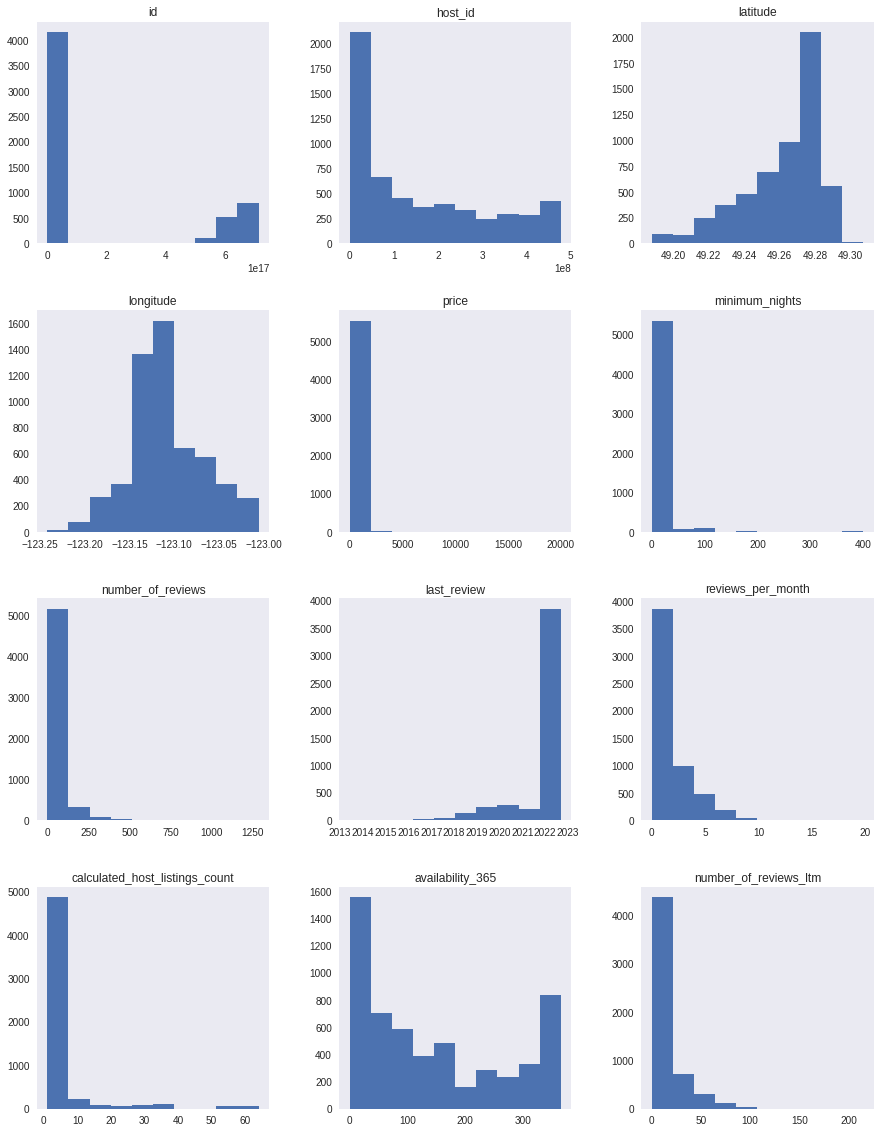

In [ ]:
# Using the seaborn plotting view
plt.style.use('seaborn')

# Plotting the histogram of numeric variables
df_covid_airbnb.hist(figsize=(15,20), grid=False);


Here we can see that most variables have an asymmetric distribution and extract some insights:

- Based on the distribution of latitude and longitude, the locations are likely to be concentrated in a certain region.
- The most recent review was given in 2022 and on the same date that the dataset was published, showing that the Airbnb listings have a high turnover rate.
- The `calculated_host_listings_count`, `number_of_reviews`, `reviews_per_month`, `number_of_reviews_ltm`, `minimum_nights` are concentrated in intervals with the lowest values in the dataset.
- The availability of the listing in days (`availability_365`) consistently changes depending on the listing. This means the places tend to be available for different days throughout the year.

### **Q4. What is the average rental price?**

In [ ]:
# Calculating the average price
df_covid_airbnb.price.mean()

233.4032663316583

The average price of a listing is CAD $233.40.

### **Q5. Are there outliers?** ###

By the histogram distribution, it is possible to verify the evidence of outliers (these are unusual values, in other words, data points differ significantly from other observations). Outliers present a particular challenge for analysis. Identifying, understanding and treating these values is essential, as they can give us an incorrect picture of our data.


###_Why outlier exists?_
There are generally two reasons for the existence of outliers: 

First, the data might be entered incorrectly. These errors can be a result of human error, generated by the system or a result of an incorrect calculation. Second, they may be real data points which are present because of the nature of the data.

Let's take as an example the `price`, `minimum_nights` and `calculated_host_listing_count` variables. The values do not follow a distribution and distort the entire graphical representation.
To confirm the presence of outliers, I will use these two methods:

* Statistical summary using describe()
* Boxplot and IQR Score Method


In [ ]:
# Having a general view of the variables
df_covid_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5572.0,5572.0,5572.0,5572.0,5572.0,5572.0
mean,233.4,16.7,39.3,1.6,4.9,142.2
std,450.0,32.7,72.0,2.0,10.6,126.9
min,0.0,1.0,0.0,0.0,1.0,0.0
25%,115.8,2.0,2.0,0.2,1.0,24.0
50%,170.0,3.0,12.0,0.8,1.0,102.0
75%,262.0,30.0,46.0,2.5,3.0,257.2
max,20000.0,399.0,1285.0,19.8,64.0,365.0


Looking at the statistical summary above, I can confirm some hypotheses, such as:

The `price` variable has 75% of the values below CAD 262.00, but its maximum value is CAD 20,000.00. Based on this, there is evidence of the presence of outliers on this variable. The minimum number of nights (`minimum_nigts`) is 1 night, but the max value is 399 days (over a year), which also shows outliers in the `minimum_night` column.


## Removing Outliers

To address the outliers of this dataset, I will check the statistical distribution, plot boxplots and find the upper and the lower limits of the boxplots using the IQR Score.

The IQR Score method lists the data values from least to greatest. When the values are in ascending order, it is possible to identify the median (Q2). This value is the midpoint in the data set,  dividing the data into a lower 50% and an upper 50%.

The IQR is calculated subtracting the third quartile (75%) from the first quartile (25%).


# IQR = Q3 - Q1


<p align="center"><img src="https://www.simplypsychology.org/boxplot-outliers.png", width="50%"></p>

Let's take a look at the data and see the findings.

In [ ]:
# Identifying outliers in the price column
q1_price = df_covid_airbnb.price.quantile(.25)
q3_price = df_covid_airbnb.price.quantile(.75)
IQR_price = q3_price - q1_price
print('Price IQR:', IQR_price)

# Defining the upper and the lower limits                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Price upper limit:', sup_price)
print('Price lower limit:', inf_price)


Price IQR: 146.25
Price upper limit: 481.375
Price lower limit: -103.625


I can conclude that I do not have lower outliers, as the minimum price is zero. The zero price will be excluded from the dataset as it does not make sense to have a listing which is 0 CAD. I will also exclude the higher outliers, representing 6.55% of the data, as shown below.

#### Boxplot for price



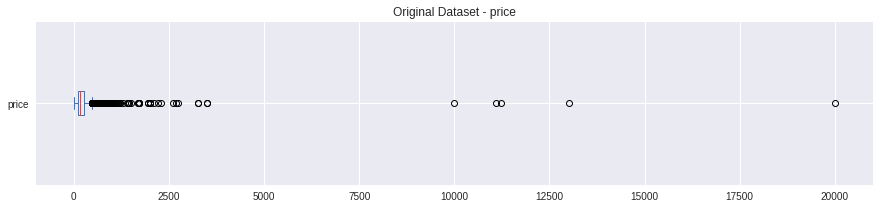

The dataset has 5572 columns
365 entries greater than 481.37
Representing 6.55% of the dataset


In [ ]:
# Verifying the original dataset
fig, ax = plt.subplots(figsize=(15,3))
df_covid_airbnb.price.plot(kind='box', vert=False);
ax.set_title('Original Dataset - price')
plt.show()
print("The dataset has {} columns".format(df_covid_airbnb.shape[0]))
print("{} entries greater than 481.37".format(len(df_covid_airbnb[df_covid_airbnb.price > sup_price])))
print("Representing {:.2f}% of the dataset".format((len(df_covid_airbnb[df_covid_airbnb.price > sup_price]) / df_covid_airbnb.shape[0])*100))



In [ ]:
# Identifying the outliers in the minimum_nights column
q1_minimum_nights = df_covid_airbnb.minimum_nights.quantile(.25)
q3_minimum_nights = df_covid_airbnb.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('Mininum nights IQR: ', IQR_minimum_nights)

# Defining the upper and the lower limits                                                                              
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Minimum_nights upper limit:', sup_minimum_nights)
print('Minimum_nights lower limit:', inf_minimum_nights)

Mininum nights IQR:  28.0
Minimum_nights upper limit: 72.0
Minimum_nights lower limit: -40.0


I can conclude that the `minimum_nights` variable has no lower outliers, as minimum night is 1 night. However, I will exclude the higher outliers, representing 2.94% of the data, as shown below.

#### Boxplot para minimum_nights


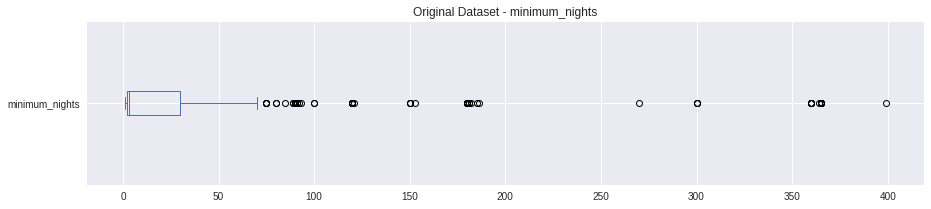

The dataset has 5572 columns
164 entries greater than 72
Representing 2.94% of the dataset


In [ ]:
# Verifying the original dataset
fig, ax = plt.subplots(figsize=(15,3))
df_covid_airbnb.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Original Dataset - minimum_nights')
plt.show()
print("The dataset has {} columns".format(df_covid_airbnb.shape[0]))
print("{} entries greater than 72".format(len(df_covid_airbnb[df_covid_airbnb.minimum_nights > sup_minimum_nights])))
print("Representing {:.2f}% of the dataset".format((len(df_covid_airbnb[df_covid_airbnb.minimum_nights > sup_minimum_nights]) / df_covid_airbnb.shape[0])*100))

In [ ]:
# Cleaning the dataset/excluding the outliers
df_covid_clean = df_covid_airbnb.copy()

df_covid_clean.drop(df_covid_clean[df_covid_clean.price > sup_price].index, axis=0, inplace=True)
df_covid_clean.drop(df_covid_clean[df_covid_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
df_covid_clean.drop((df_covid_clean[df_covid_clean.price == 0]).index, axis=0, inplace=True)

print('Dataset shape with outliers:', df_covid_airbnb.shape)
print('Dataset shape without outliers:',df_covid_clean.shape)


Dataset shape with outliers: (5572, 17)
Dataset shape without outliers: (5051, 17)


#### Boxplot for price and minimum_nights in the clean dataset



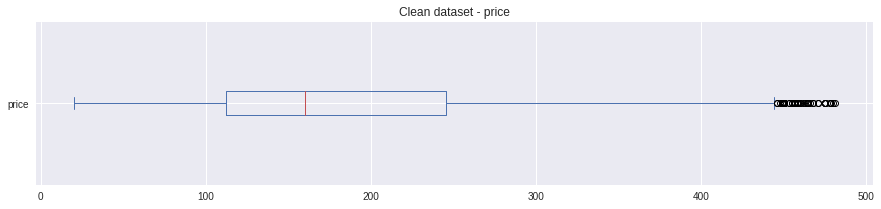

Original dataset: 5572 columns
Clean dataset: 5051 columns


In [ ]:
# Verifying the clean dataset - price variable
fig, ax = plt.subplots(figsize=(15,3))
df_covid_clean.price.plot(kind='box', vert=False);
ax.set_title('Clean dataset - price')
plt.show()
print("Original dataset: {} columns".format(df_covid_airbnb.shape[0]))
print("Clean dataset: {} columns".format(df_covid_clean.shape[0]))

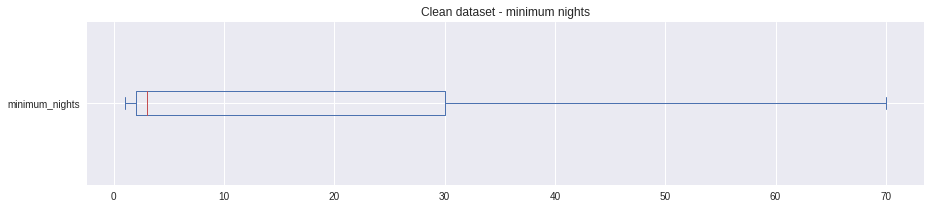

Original dataset: 5572 columns
Clean dataset: 5051 columns


In [ ]:
# Verifying the clean dataset - minimum nights variable
fig, ax = plt.subplots(figsize=(15,3))
df_covid_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Clean dataset - minimum nights')
plt.show()
print("Original dataset: {} columns".format(df_covid_airbnb.shape[0]))
print("Clean dataset: {} columns".format(df_covid_clean.shape[0]))

Next, I will check the frequency distribution of variables after deleting the outliers.




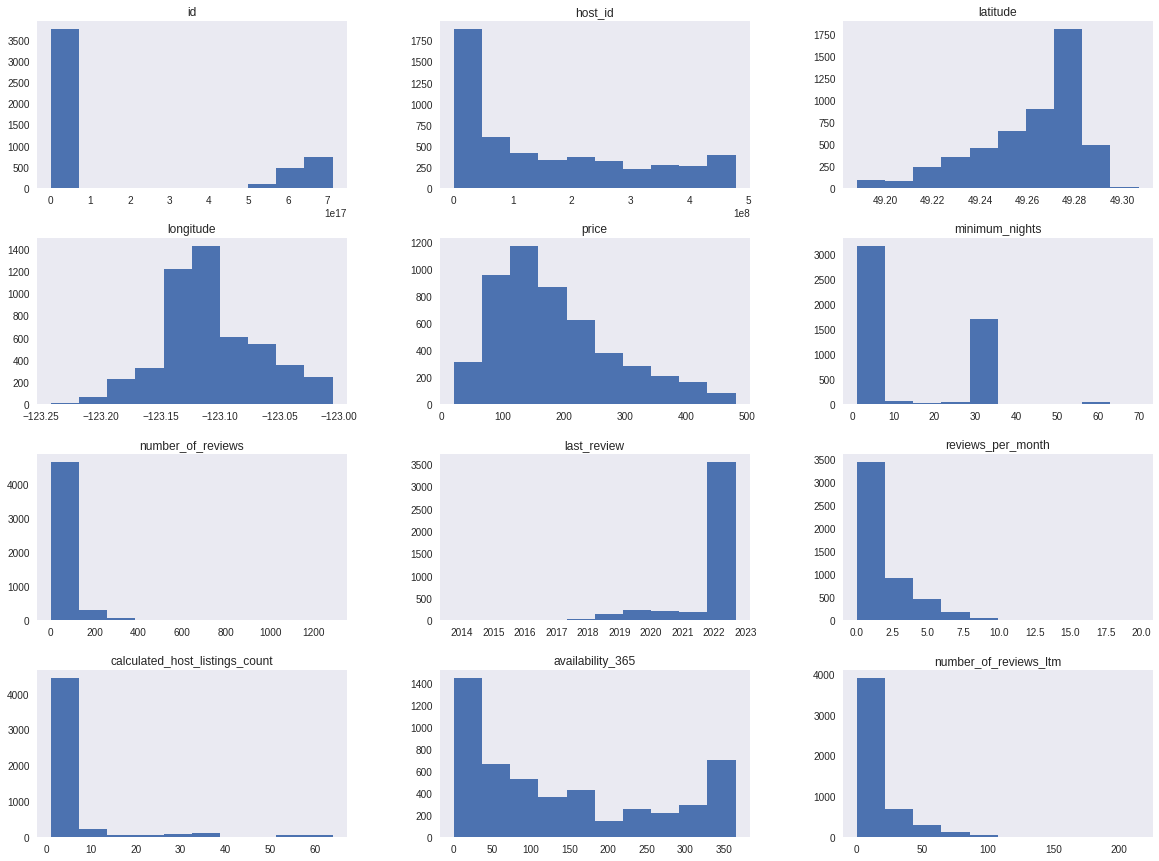

In [ ]:
# Using seaborn plotting view
plt.style.use('seaborn')

# Plotting the histogram of numeric variables
df_covid_clean.hist(figsize=(20,15), grid=False);

Now that I have cleaned the data, will recheck the variables.

In [ ]:
# Having a general view of the variables
df_covid_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5051.0,5051.0,5051.0,5051.0,5051.0,5051.0
mean,185.2,12.7,41.2,1.7,4.9,137.8
std,96.8,14.0,74.2,2.0,10.6,125.2
min,20.0,1.0,0.0,0.0,1.0,0.0
25%,112.0,2.0,2.0,0.2,1.0,22.0
50%,160.0,3.0,13.0,0.9,1.0,97.0
75%,245.5,30.0,49.0,2.6,3.0,250.0
max,481.0,70.0,1285.0,19.8,64.0,365.0


0.6408631954068501

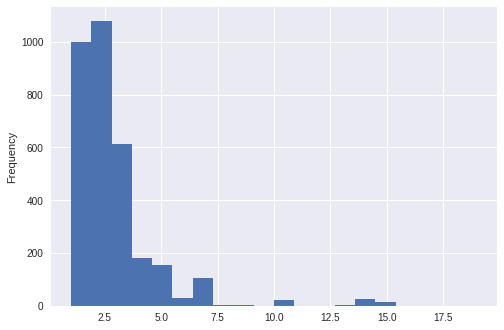

In [ ]:
df_covid_clean.minimum_nights[df_covid_clean.minimum_nights < 20].plot.hist(bins=20);
df_covid_clean.minimum_nights[df_covid_clean.minimum_nights < 20].shape[0] / df_covid_clean.shape[0]


The calculated median price is CAD 160.00 and the average price is CAD 185.20 after excluding the outliers. In the dataset with outliers, the median price was CAD 170.00 and the average was CAD 233.40, which shows the average is more sensitive to outliers than the median. Even though 75% of the minimum_nights are lower than 30 days and our maximum `minimum_nights` is 70 days, I can see that 64% of the minimum number of stayed nights are lower than 20 nights.

### **Q6. What type of property is most rented on Airbnb?**

The `room_type` variable column indicates the rental type advertised on Airbnb. People who have already rented with the company know there are options for entire houses or apartments, single rooms, or even sharing rooms with others.

Let's count the number of occurrences of each rental type, using the `value_counts()` method.

In [ ]:
# Room type distribution
df_covid_clean.room_type.value_counts()

Entire home/apt    4069
Private room        958
Shared room          19
Hotel room            5
Name: room_type, dtype: int64

In [ ]:
df_covid_clean.room_type.value_counts(1)
#df_covid_clean.room_type.value_counts() / df_covid_clean.shape[0]

Entire home/apt    0.805583
Private room       0.189665
Shared room        0.003762
Hotel room         0.000990
Name: room_type, dtype: float64

Entire home/apartment and private rooms represent more than 98% of the dataset, indicating the focus/differentiation of the Airbnb business in Vancouver. On the other hand, hotel rooms and shared rooms are not a substantial part of the business.

### **Q7. What neighbourhoods have more Airbnb rentals?**

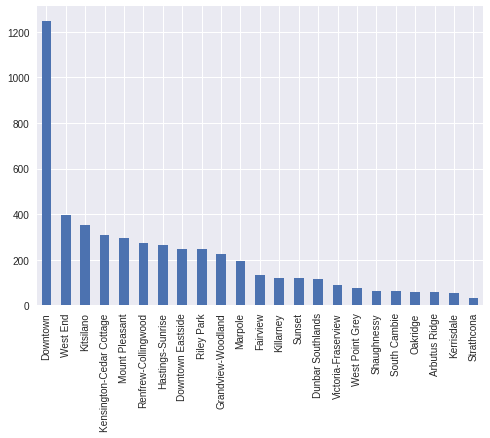

In [ ]:
# Checking the rentals by regions
df_covid_clean.neighbourhood.value_counts().plot(kind='bar',rot=90);

As we can see, the top 5 Airbnb neighbourhoods being rented are Downtown, West End, Kitsilano, Kensington-Cedar Cottage and Mount Pleasant.

### **Q8. What are the most expensive locations in Vancouver?**

One way to check one variable against another is to use `groupby()`. In this case, I want to compare the neighbourhoods based on the rental price.

In [ ]:
# Checking the average of price per neighbourhood
df_covid_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:30]


neighbourhood
Downtown                    226.291433
Downtown Eastside           209.153226
Kitsilano                   203.468927
Strathcona                  191.727273
West Point Grey             191.692308
West End                    188.716080
Mount Pleasant              187.726351
Arbutus Ridge               184.689655
Grandview-Woodland          177.709821
Dunbar Southlands           172.852174
Riley Park                  168.353659
Killarney                   167.852459
Fairview                    166.015038
Marpole                     159.865979
Shaughnessy                 157.312500
Victoria-Fraserview         156.615385
South Cambie                150.793651
Hastings-Sunrise            149.811321
Renfrew-Collingwood         146.746377
Sunset                      146.583333
Kensington-Cedar Cottage    145.719355
Oakridge                    131.627119
Kerrisdale                  127.381818
Name: price, dtype: float64

I can conclude that Downtown, Downtown Eastside, Kitsilano 
and Strathcona have the highest average prices per listing. Kerrisdale, Oakridge, Kensington-Cedar Cottage and Sunset have the lowest average prices.

### **Q9. What is the minimum_nights rental average?**


In [ ]:
# Checking the `minimum_nights`average
df_covid_clean.minimum_nights.mean()

12.719461492773709

In Vancouver, Airbnb guests rent a minimum of 13 nights on average.

As Latitudes and Longitudes information is provided for each property, it is possible to plot the location. For this, I will consider x_axis = longitude and y_axis = latitude.

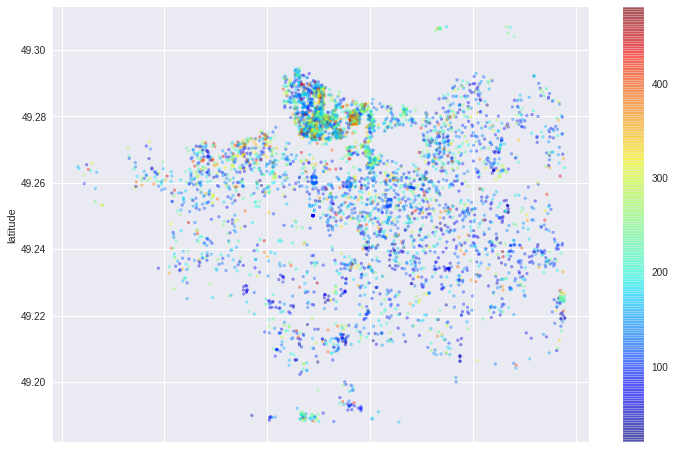

In [ ]:
# Plotting the Airbnb places location by latitude and longitude
df_covid_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_covid_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q10. What is the correlation between the variables?**

Here I will check if there is a relationship or similarity between the variables.

This relationship can be measured using the correlation coefficient to establish the intensity. To identify the existing correlations between the variables of interest, I will:

* Create a correlation matrix
* Plot a correlation heatmap using the seaborn library

In [ ]:
# Creating correlation matrix
corr = df_covid_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# Displaying correlation matrix 
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.248137,-0.029934,0.178842,-0.020630,0.093605
minimum_nights,-0.248137,1.000000,-0.230852,-0.459020,0.247464,0.175462
number_of_reviews,-0.029934,-0.230852,1.000000,0.443699,-0.142824,-0.034876
reviews_per_month,0.178842,-0.459020,0.443699,1.000000,-0.148752,0.033941
calculated_host_listings_count,-0.020630,0.247464,-0.142824,-0.148752,1.000000,0.101404
availability_365,0.093605,0.175462,-0.034876,0.033941,0.101404,1.000000


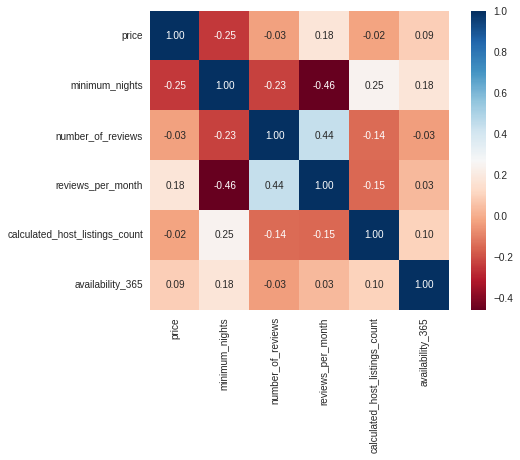

In [ ]:
# Plotting a correlation heatmap
sns.heatmap(corr, cmap = 'RdBu', fmt='.2f', square = True , linecolor='white', annot= True);

In general, no significant correlation was found between the price and the other variables. It is interesting to mention the slightly negative correlation between price and minimum_nights variable (-0.25), showing that the higher the daily price is, the lower the number of stayed nights, which would be logical to conclude without the correlation heatmap. 

## Discussions

In this project, I analyzed the Airbnb Dataset and found there were *outliers* in some of the variables.

I noticed that in some locations, only a few observations were available, which can distort the statistical information of some attributes.

People are mostly renting home/apartment and private rooms in Vancouver (around 98% of the dataset).

Downtown, West End and Kitsilano are some of the neighbourhoods with the highest daily price on average. However, in these areas, more listings being rented compared to other areas.

Finally, this *dataset* is a summarized version. For further exploratory data analysis, it might be interesting to use the complete dataset, which contains over 70 attributes.

## Resources used
* [Hands-on Data Science by Sigmoidal](https://sigmoidal.ai/)
* [Python Programming](https://www.python.org/)
* [Covid-19 - Data Source](https://github.com/owid/covid-19-data/tree/master/public/data)

* [Airbnb Statistics](https://ipropertymanagement.com/research/airbnb-statistics)
* [Festival and Events in Vancouver](https://curiocity.com/vancouver/)
* [Missing values](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
* [Movies filmed in Vancouver](https://www.canadiantraveller.com/movies_filmed_in_vancouver)
* [About Vancouver](https://worldf_covidorumfoundation.org/2021-about-vancouver/)
* [Statcan](https://www12.statcan.gc.ca/census-recensement/index-eng.cfm)
